Importing Necessary Libraries

In [59]:
import pandas as pd
import os
import numpy as np

Merging 12 months of sales into a single CSV file 

In [60]:
df =pd.read_csv("./Sales_Data/Sales_April_2019.csv")

### read all files from directory
files = [file for file in os.listdir('./Sales_Data')]

### creating empty data frame
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    ### concatenate each month
    all_months_data = pd.concat([all_months_data, df])

### saving withouth indexes
    all_months_data.to_csv("all_data.csv", index=False)


Read in updated dataframe
--> don't have to run code above to acess all data file 

In [61]:
all_data = pd.read_csv("all_data.csv")
all_data.head ()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


Question 1: What was the best month for sales? How much was earned that month? 

In [62]:
### debug
import pandas as pd
all_data = pd.read_csv("all_data.csv")

Data Cleanup

In [63]:
### converting columns to the correct type
all_data['Quantity Ordered'] = pd.to_numeric (all_data['Quantity Ordered'], errors='coerce') 
all_data['Price Each'] = pd.to_numeric (all_data['Price Each'], errors='coerce') 

In [64]:
### finding "Or" by indexing it and delating it
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [65]:
### checking for missing or incomplete data in the entire dataset
missing_values = all_data.isna()

### checking for missing values in each column
print(missing_values.any(axis=0)) 

### checking for missing values in each row
print(missing_values.any(axis=1)) 


Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool
0         False
1         False
2         False
3         False
4         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186495, dtype: bool


In [66]:
### checking missing data from purchase address column
missing_data = all_data['Purchase Address'].isna()
incomplete_data = all_data['Purchase Address'].str.contains(' ,')
print(f"Number of missing values: {missing_data.sum()}")
print(f"Number of incomplete values: {incomplete_data.sum()}")

Number of missing values: 545
Number of incomplete values: 0


In [67]:
### clean 
all_data.dropna(inplace=True)

In [68]:
### checking missing data from purchase address column
missing_data = all_data['Purchase Address'].isna()
incomplete_data = all_data['Purchase Address'].str.contains(' ,')
print(f"Number of missing values: {missing_data.sum()}")
print(f"Number of incomplete values: {incomplete_data.sum()}")


Number of missing values: 0
Number of incomplete values: 0


Task 1: Add Month Column

In [69]:
### adding "Month" column, grabing from "Order Date" the first two characters
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


Task 2: Add Sales Column

In [70]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


Task 3: Group by Month and sum

In [71]:
results = all_data.groupby('Month').sum(numeric_only=True)
results

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903.0,1811768.38,1822256.73
02,13449.0,2188884.72,2202022.42
03,17005.0,2791207.83,2807100.38
04,20558.0,3367671.02,3390670.24
05,18667.0,3135125.13,3152606.75
06,15253.0,2562025.61,2577802.26
07,16072.0,2632539.56,2647775.76
08,13448.0,2230345.42,2244467.88
09,13109.0,2084992.09,2097560.13


Answer: Best month for sales was December with 4 613 443.34 US $ income in Sales.

Data Visualisation 

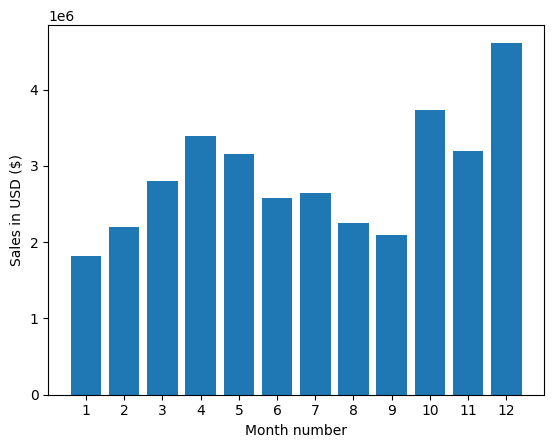

In [72]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

Question 2: Which city had the highest number of sales?

Task 1: Add city column

In [73]:
all_data['Purchase Address'] = all_data['Purchase Address'].astype(str)

### extract city name 
def get_city(address):
    return address.split(',')[1]

### extract state without zip code
def get_state(address):
    return address.split(',')[2].split(' ')[1]

### create City column and combine functions above
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


Task 2: Group by City

In [74]:
results = all_data.groupby('City').sum(numeric_only=True)
results

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602.0,2779908.20,2795498.58
Austin (TX),11153.0,1809873.61,1819581.75
Boston (MA),22528.0,3637409.77,3661642.01
Dallas (TX),16730.0,2752627.82,2767975.40
Los Angeles (CA),33289.0,5421435.23,5452570.80
New York City (NY),27932.0,4635370.83,4664317.43
Portland (ME),2750.0,447189.25,449758.27
Portland (OR),11303.0,1860558.22,1870732.34
San Francisco (CA),50239.0,8211461.74,8262203.91


Answer: San Francisco in California had the highest number of sales with 50 239 products ordered generating 8 262 203.91 US $ of income in the analysed year. 

Data Visualisation

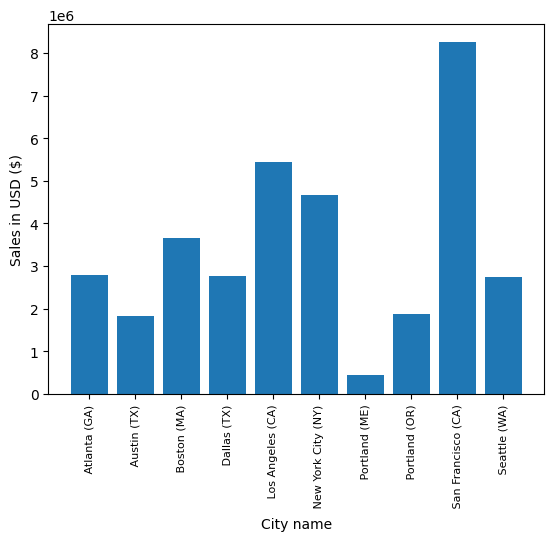

In [77]:
import matplotlib.pyplot as plt

months =months = range(1,13)
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()